# <center> <span style="font-family: Virgil GS, sans-serif; color:#97f788">Neural Networks</span> </center>
## <center> <span style="font-family: Virgil GS, sans-serif; color:navyblue">Back-propagation</span> </center>

<span style="font-family: Virgil GS, sans-serif; color:navyblue">Author: <a href="https://github.com/deburky" title="GitHub link">https://github.com/deburky</a></span>

A custom implementation of back-propagation with NumPy.

### <span style="font-family: Virgil GS, sans-serif; color: navyblue; font-size: 25px;">Datasets</span>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_moons, make_blobs, make_circles

# Set the random seed for reproducibility
np.random.seed(0)

# Define the colormap and colors for the plot
cmap_name = 'spring'
color_map = plt.colormaps[cmap_name]
colors_class_0_edge = plt.get_cmap(color_map)(0)
colors_class_0 = '#ffb2ff'
colors_class_1_edge = '#cacc01'
colors_class_1 = '#feffcc'

def generate_custom_dataset(N_points):
    # Class 1
    radiuses = np.random.uniform(0, 0.5, size=N_points//2)
    angles = np.random.uniform(0, 2*math.pi, size=N_points//2)
    
    x_1 = np.multiply(radiuses, np.cos(angles)).reshape(N_points//2, 1)
    x_2 = np.multiply(radiuses, np.sin(angles)).reshape(N_points//2, 1)
    X_class_1 = np.concatenate((x_1, x_2), axis=1)
    Y_class_1 = np.full((N_points//2,), 1)
        
    # Class 0
    radiuses = np.random.uniform(0.6, 1, size=N_points//2)
    angles = np.random.uniform(0, 2*math.pi, size=N_points//2)
    
    x_1 = np.multiply(radiuses, np.cos(angles)).reshape(N_points//2, 1)
    x_2 = np.multiply(radiuses, np.sin(angles)).reshape(N_points//2, 1)
    X_class_0 = np.concatenate((x_1, x_2), axis=1)
    Y_class_0 = np.full((N_points//2,), 0)
        
    X = np.concatenate((X_class_1, X_class_0), axis=0)
    Y = np.concatenate((Y_class_1, Y_class_0), axis=0)
    return X, Y

def generate_dataset(name='custom', N_points=1000):
    if name == 'moons':
        X, Y = make_moons(n_samples=N_points, noise=0.1, random_state=0)
    elif name == 'blobs':
        X, Y = make_blobs(n_samples=N_points, centers=2, n_features=2, random_state=0) # type: ignore
    elif name == 'circles':
        X, Y = make_circles(n_samples=N_points, noise=0.1, random_state=0)
    elif name == 'xor':
        X = np.random.uniform(-1, 1, size=(N_points, 2))
        Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
    else:
        X, Y = generate_custom_dataset(N_points)
    return X, Y

def plot_dataset(X, Y):
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color=colors_class_1, edgecolor=colors_class_1_edge, label='class 1')
    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color=colors_class_0, edgecolor=colors_class_0_edge, label='class 0')
    plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
    plt.axis("off")
    plt.show()

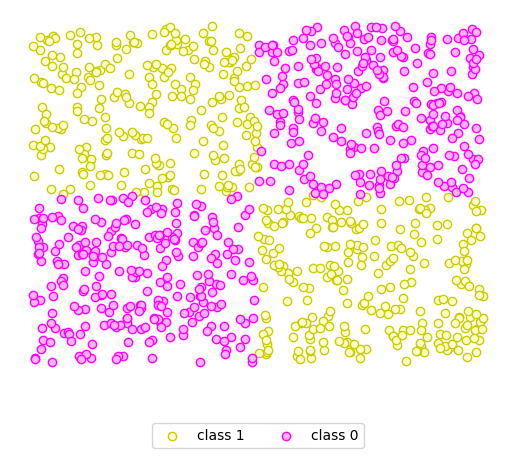

In [3]:
# X_train, y_train = generate_dataset(name='moons', N_points=1000)
# plot_dataset(X_train, y_train)

# X_train, y_train = generate_dataset(name='blobs', N_points=1000)
# plot_dataset(X_train, y_train)

# X_train, y_train = generate_dataset(name='circles', N_points=1000)
# plot_dataset(X_train, y_train)

X_train, y_train = generate_dataset(name='xor', N_points=1000)
plot_dataset(X_train, y_train)

# X_train, y_train = generate_dataset(name='custom', N_points=1000)
# plot_dataset(X_train, y_train)

### <span style="font-family: Virgil GS, sans-serif; color: navyblue; font-size: 25px;">Neural Network</span>
 
A one-layer neural network with three neurons in the hidden layer.

In [40]:
import numpy as np

cmap_name = 'spring'
color_map = plt.colormaps[cmap_name]
colors_class_0_edge = plt.get_cmap(color_map)(0)
colors_class_0 = '#ffb2ff'
colors_class_1_edge = '#cacc01'
colors_class_1 = '#feffcc'

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def leaky_relu(x, alpha=1e-2):
    return np.where(x > 0, x, x * alpha)

def leaky_relu_derivative(x, alpha=1e-2):
    return np.where(x > 0, 1, alpha)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

def forward_pass(X, weights, activation: str = 'sigmoid'):
    # Perform a forward pass
    Z1 = np.dot(X, weights['W1'].T) + weights['b1']
    if activation == 'sigmoid':
        H = sigmoid(Z1)
    elif activation == 'relu':
        H = relu(Z1)
    elif activation == 'leaky_relu':
        H = leaky_relu(Z1)
    else:
        H = tanh(Z1)
    Z2 = np.dot(H, weights['W2'].T) + weights['b2']
    Y = sigmoid(Z2)
    return np.clip(Y, 1e-10, 1 - 1e-10), Z2, H, Z1

def back_propagation(X, Y_T, weights, activation='sigmoid'):
    N_points = X.shape[0]
    # Forward pass
    Y, Z2, H, Z1 = forward_pass(X, weights, activation='sigmoid')
    L = (1 / N_points) * np.sum(-Y_T * np.log(Y) - (1 - Y_T) * np.log(1 - Y))
    # Back propagation
    dLdY = 1 / N_points * np.divide(Y - Y_T, np.multiply(Y, 1 - Y))
    dLdZ2 = np.multiply(dLdY, np.multiply(sigmoid(Z2), (1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)
    dLdb2 = np.dot(dLdZ2.T, np.ones(N_points))
    dLdH = np.dot(dLdZ2.reshape(N_points, 1), weights['W2'].reshape(1, 3))
    if activation == 'relu':
        dLdZ1 = dLdH * relu_derivative(Z1)
    elif activation == 'leaky_relu':
        dLdZ1 = dLdH * leaky_relu_derivative(Z1)
    elif activation == 'tanh':
        dLdZ1 = dLdH * tanh_derivative(Z1)
    else:
        dLdZ1 = dLdH * sigmoid_derivative(Z1)
    dLdW1 = np.dot(dLdZ1.T, X)
    dLdb1 = np.dot(dLdZ1.T, np.ones(N_points))
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    return gradients, L

def visualization(weights, X, y, title, show_points=False):
    N_test_points = len(X)
    xs = np.linspace(1.01*np.min(X), 1.01*np.max(X), N_test_points)
    datapoints = np.transpose([np.tile(xs, len(xs)), np.repeat(xs, len(xs))])
    Y_initial = forward_pass(datapoints, weights)[0].reshape(N_test_points, N_test_points)
    X1, X2 = np.meshgrid(xs, xs)
    plt.pcolormesh(X1, X2, Y_initial, cmap=cmap_name)
    plt.colorbar(label='P(+)')
    if show_points and y is not None:
        plt.scatter(
            X[y == 1, 0],
            X[y == 1, 1],
            color=colors_class_1,
            edgecolor=colors_class_1_edge,
            linewidth=1.0
        )
        plt.scatter(
            X[y == 0, 0],
            X[y == 0, 1],
            color=colors_class_0,
            edgecolor=colors_class_0_edge,
            linewidth=1.0
        ) 
    # plt.title(title)
    plt.axis('off')
    plt.show()

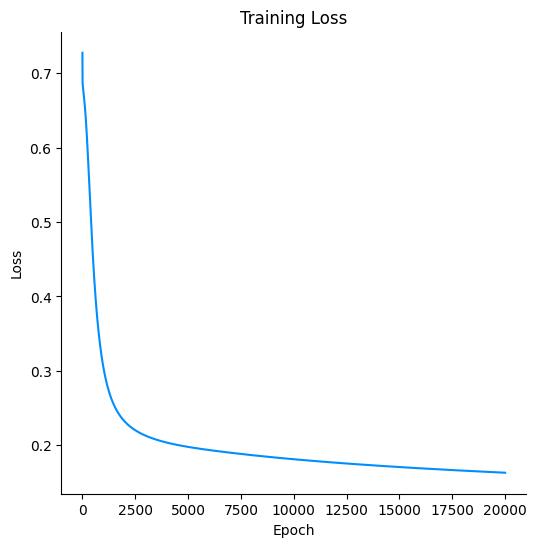

In [5]:
import numpy as np
import copy
np.random.seed(0)

# Set the hyperparameters
hidden_size, input_size = 3, 2
n_points = len(X_train)
activation = 'tanh'

epochs = 20_000
epsilon = 0.3

# Initialize weights
weights_sigmoid = {
    'W1': np.random.randn(hidden_size, input_size),
    'b1': np.ones(3),
    'W2': np.random.randn(hidden_size),
    'b2': 0,
}

weights_relu = {
    'W1': np.random.randn(hidden_size, input_size) / np.sqrt((input_size + hidden_size) / n_points),
    'b1': np.ones(hidden_size),
    'W2': np.random.randn(hidden_size) / np.sqrt(hidden_size / n_points),
    'b2': 1,
}

# Choose initial weights based on the activation function
if activation in {'sigmoid', 'tanh'}:
    weights = weights_sigmoid
elif activation in {'relu', 'leaky_relu'}:
    weights = weights_relu

initial_weights = copy.deepcopy(weights)

losses = []
for _ in range(epochs):
    gradients, L = back_propagation(X_train, y_train, weights, activation=activation)
    for weight_name in weights:
        weights[weight_name] -= epsilon * gradients[weight_name]

    losses.append(L)

fig = plt.figure(figsize=(6, 6))
plt.plot(losses, linewidth=1.5, color='#008eff')
plt.title('Training Loss')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

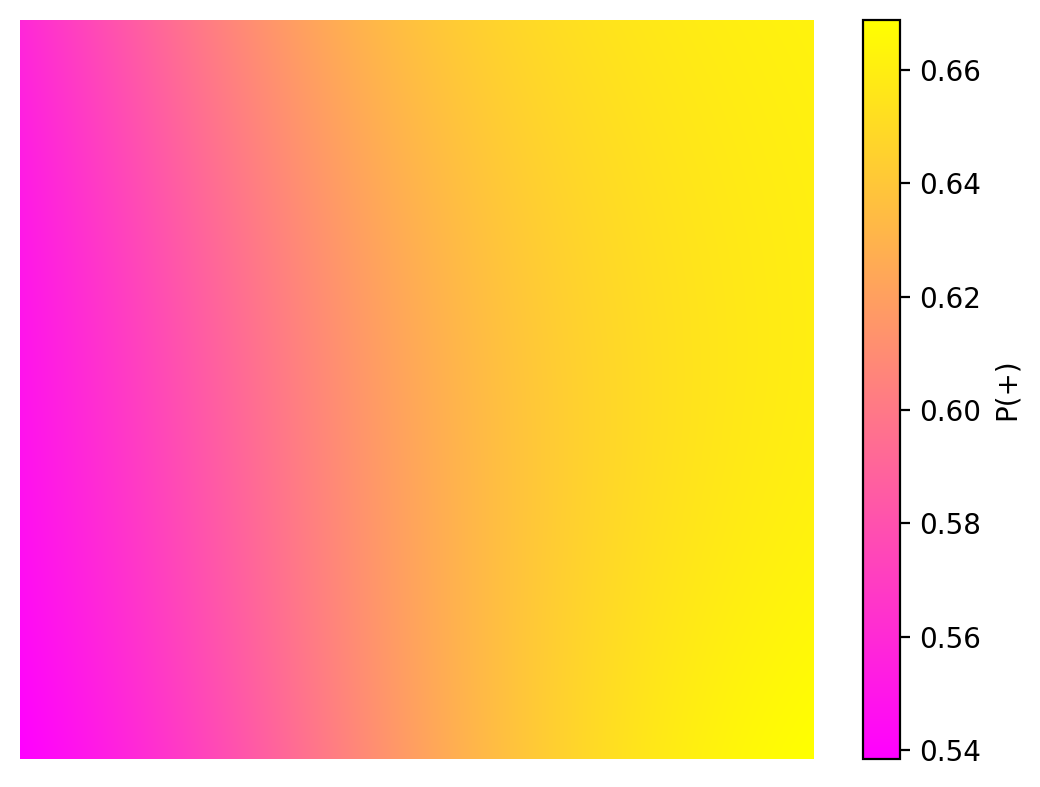

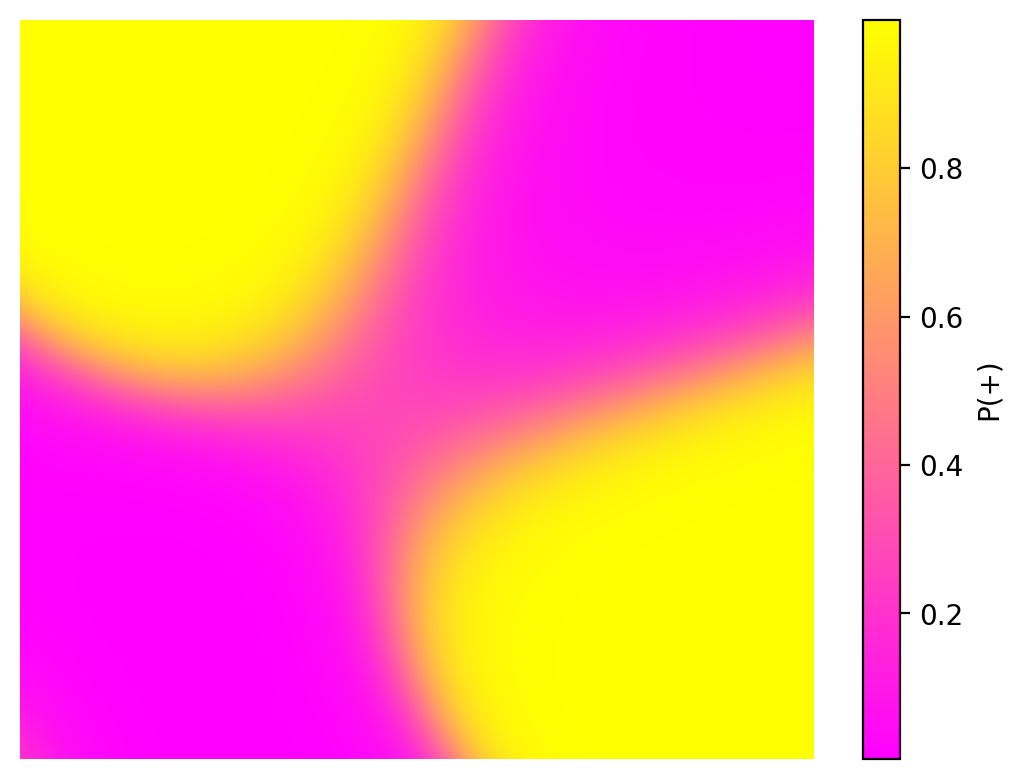

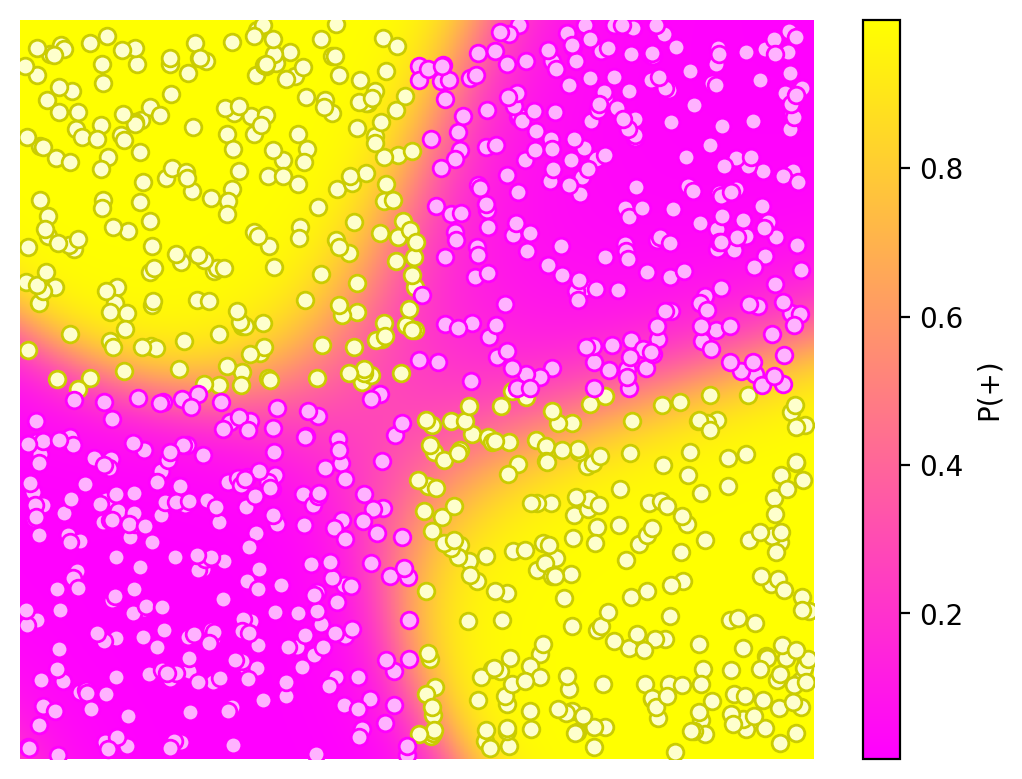

In [6]:
%config InlineBackend.figure_format = 'retina'

visualization(initial_weights, X_train, y_train, title='Visualization before learning')
visualization(weights, X_train, y_train, title='Visualization after learning')
visualization(weights, X_train, y_train, 'Visualization after learning', show_points=True)

### <span style="font-family: Virgil GS, sans-serif; color: navyblue; font-size: 25px;">MNIST</span>

Epoch 100/3000, Loss: 1.4475
Epoch 200/3000, Loss: 0.9200
Epoch 300/3000, Loss: 0.6838
Epoch 400/3000, Loss: 0.5378
Epoch 500/3000, Loss: 0.4351
Epoch 600/3000, Loss: 0.3584
Epoch 700/3000, Loss: 0.2991
Epoch 800/3000, Loss: 0.2524
Epoch 900/3000, Loss: 0.2151
Epoch 1000/3000, Loss: 0.1851
Epoch 1100/3000, Loss: 0.1607
Epoch 1200/3000, Loss: 0.1406
Epoch 1300/3000, Loss: 0.1239
Epoch 1400/3000, Loss: 0.1099
Epoch 1500/3000, Loss: 0.0983
Epoch 1600/3000, Loss: 0.0885
Epoch 1700/3000, Loss: 0.0802
Epoch 1800/3000, Loss: 0.0731
Epoch 1900/3000, Loss: 0.0670
Epoch 2000/3000, Loss: 0.0618
Epoch 2100/3000, Loss: 0.0572
Epoch 2200/3000, Loss: 0.0532
Epoch 2300/3000, Loss: 0.0496
Epoch 2400/3000, Loss: 0.0465
Epoch 2500/3000, Loss: 0.0436
Epoch 2600/3000, Loss: 0.0411
Epoch 2700/3000, Loss: 0.0388
Epoch 2800/3000, Loss: 0.0367
Epoch 2900/3000, Loss: 0.0349
Epoch 3000/3000, Loss: 0.0331


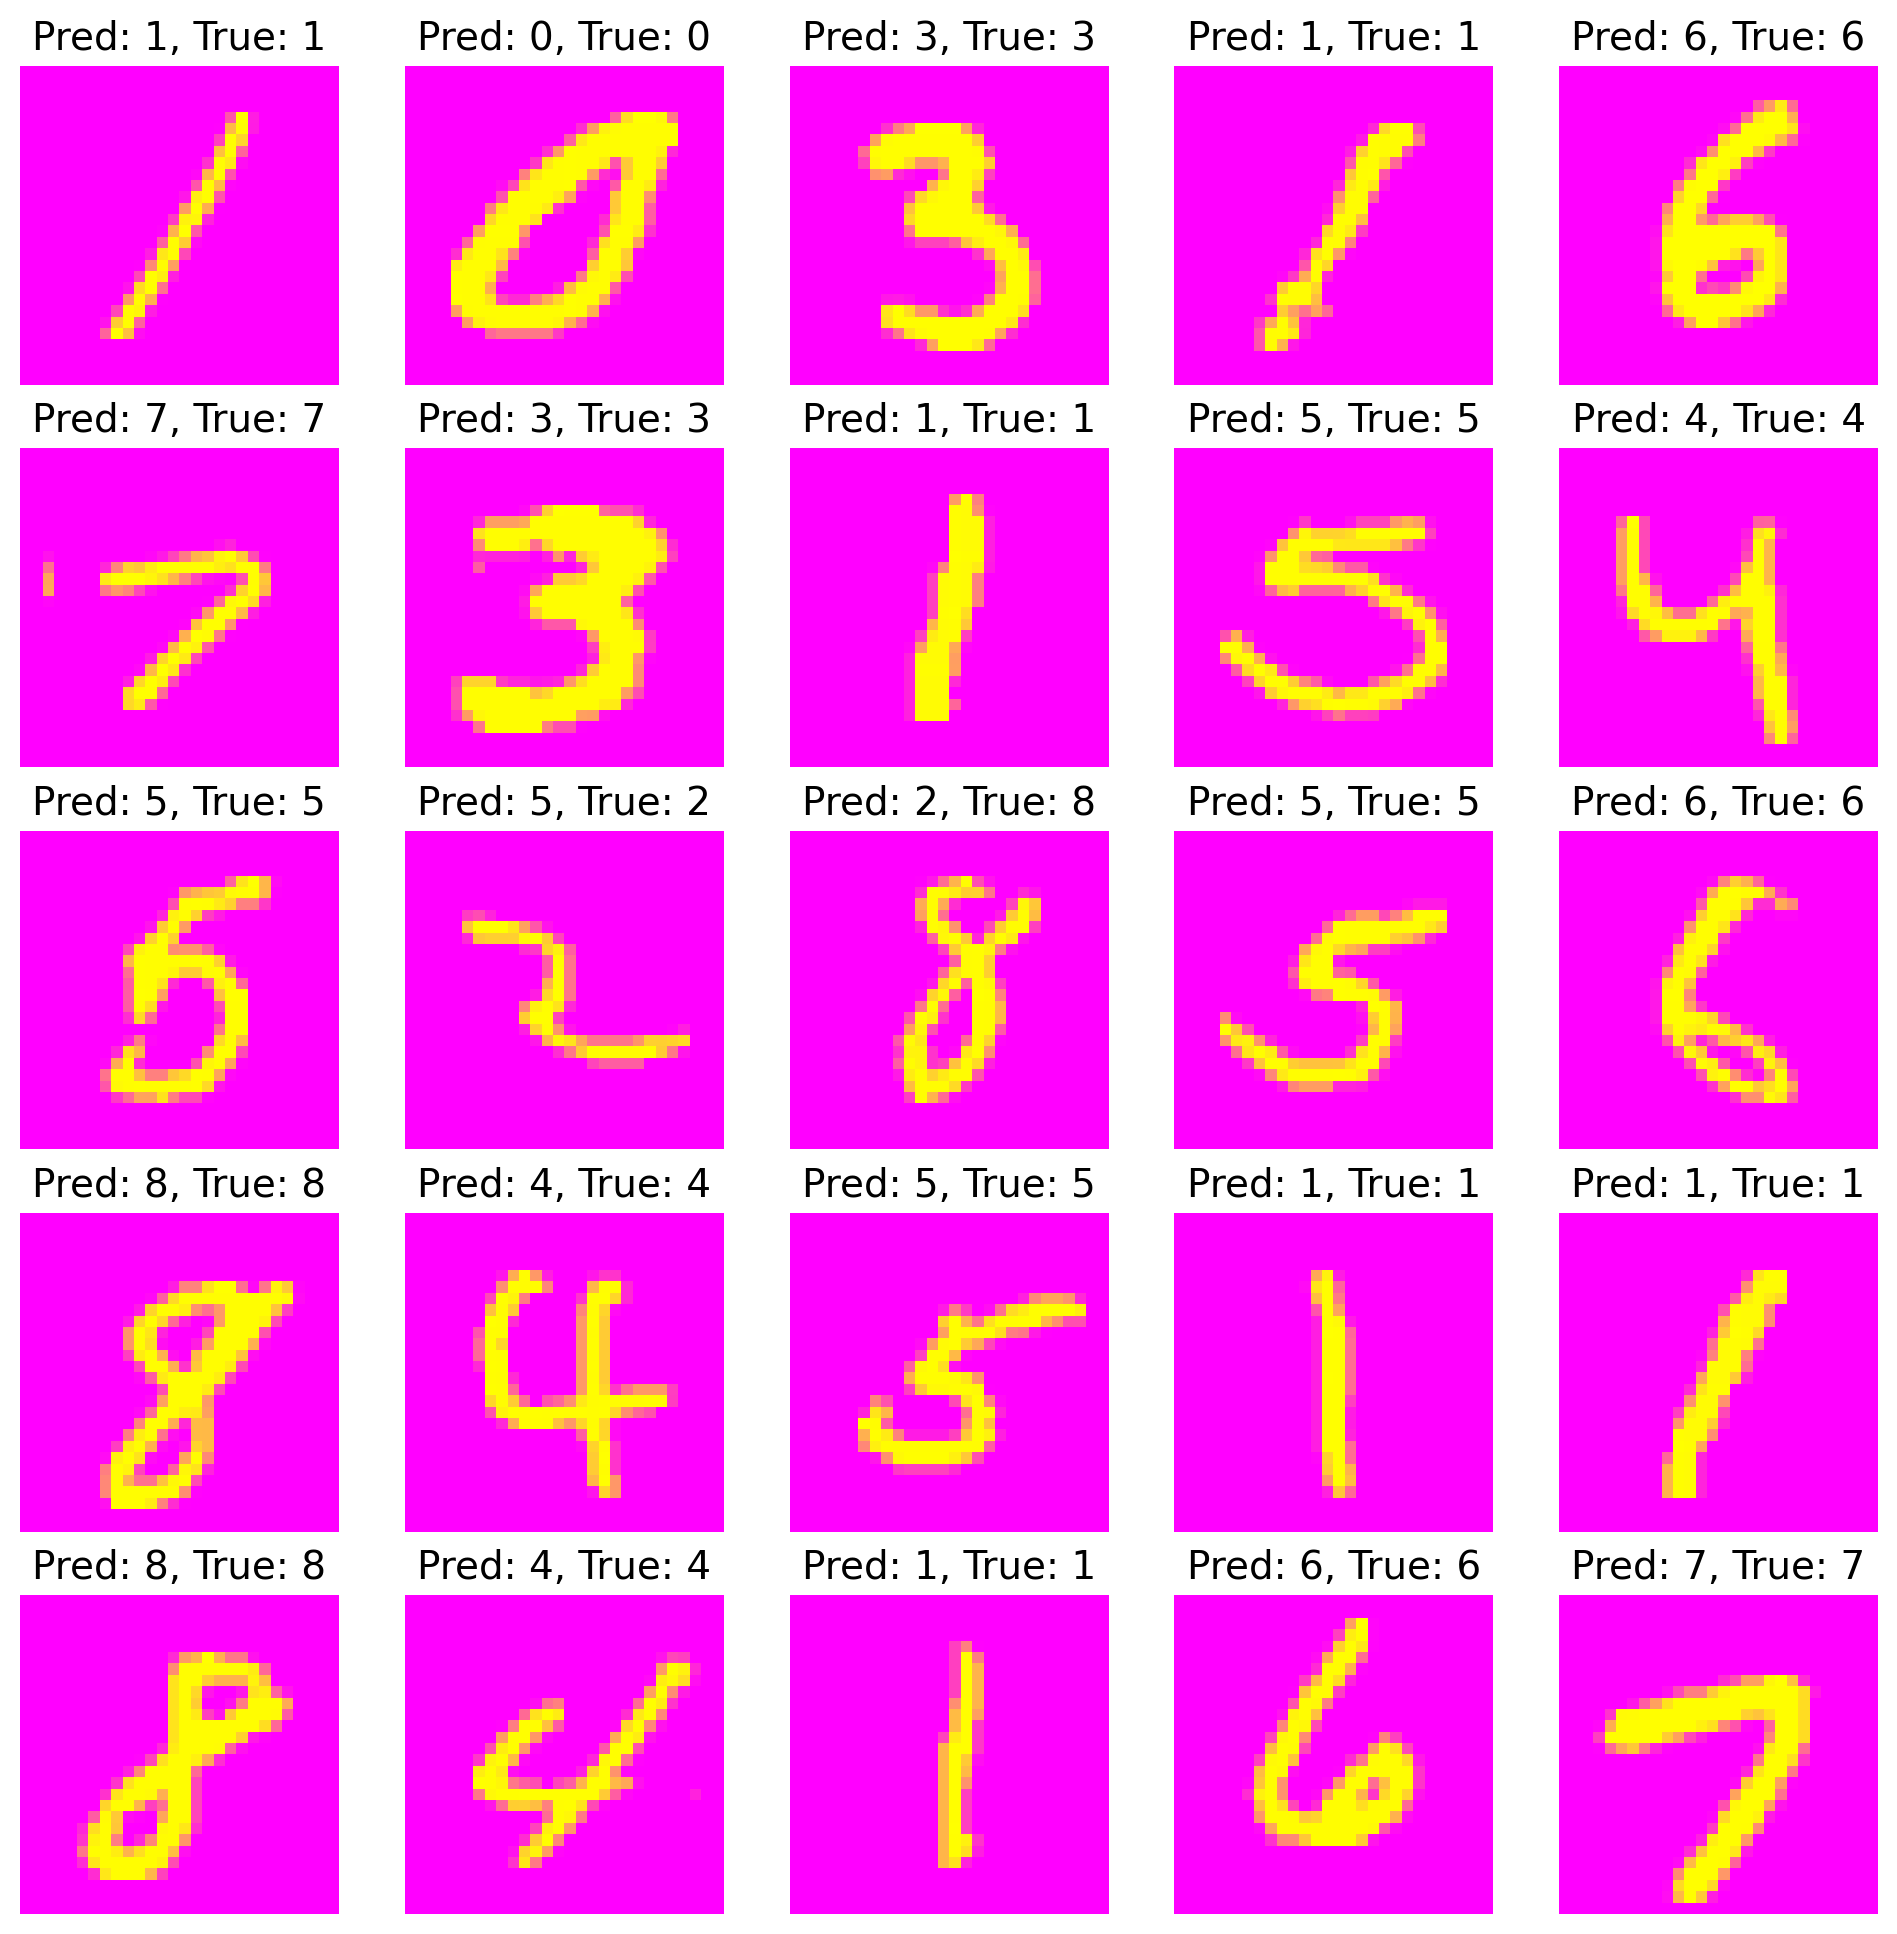

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'retina'

# Set the random seed for reproducibility
np.random.seed(0)

# Define the colormap and colors for the plot
cmap_name = 'spring'
color_map = plt.colormaps[cmap_name]
colors_class_0_edge = plt.get_cmap(color_map)(0)
colors_class_0 = '#ffb2ff'
colors_class_1_edge = '#cacc01'
colors_class_1 = '#feffcc'

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def leaky_relu(x, alpha=1e-2):
    return np.where(x > 0, x, x * alpha)

def leaky_relu_derivative(x, alpha=1e-2):
    return np.where(x > 0, 1, alpha)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

def forward_pass(X, weights, activation='sigmoid'):
    Z1 = np.dot(X, weights['W1'].T) + weights['b1']
    if activation == 'sigmoid':
        H = sigmoid(Z1)
    elif activation == 'relu':
        H = relu(Z1)
    elif activation == 'leaky_relu':
        H = leaky_relu(Z1)
    else:
        H = tanh(Z1)
    Z2 = np.dot(H, weights['W2'].T) + weights['b2']
    Y = sigmoid(Z2)
    return np.clip(Y, 1e-10, 1 - 1e-10), Z2, H, Z1

def back_propagation(X, Y_T, weights, activation='sigmoid'):
    N_points = X.shape[0]
    Y, Z2, H, Z1 = forward_pass(X, weights, activation)
    L = (1 / N_points) * np.sum(-Y_T * np.log(Y) - (1 - Y_T) * np.log(1 - Y))
    dLdY = 1 / N_points * np.divide(Y - Y_T, np.multiply(Y, 1 - Y))
    dLdZ2 = np.multiply(dLdY, np.multiply(sigmoid(Z2), (1 - sigmoid(Z2))))
    dLdW2 = np.dot(dLdZ2.T, H)
    dLdb2 = np.sum(dLdZ2, axis=0)
    # dLdH = np.dot(dLdZ2.reshape(N_points, 1), weights['W2'].reshape(1, 3))
    dLdH = np.dot(dLdZ2, weights['W2'])
    if activation == 'relu':
        dLdZ1 = dLdH * relu_derivative(Z1)
    elif activation == 'leaky_relu':
        dLdZ1 = dLdH * leaky_relu_derivative(Z1)
    elif activation == 'tanh':
        dLdZ1 = dLdH * tanh_derivative(Z1)
    else:
        dLdZ1 = dLdH * sigmoid_derivative(Z1)
    dLdW1 = np.dot(dLdZ1.T, X)
    dLdb1 = np.dot(dLdZ1.T, np.ones(N_points))
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    return gradients, L

def train_neural_network(X_train, y_train, activation='sigmoid', hidden_size=64, epochs=1000, lr=0.01):
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    weights = {
        'W1': np.random.randn(hidden_size, input_size) * np.sqrt(1. / input_size),
        'b1': np.zeros(hidden_size),
        'W2': np.random.randn(output_size, hidden_size) * np.sqrt(1. / hidden_size),
        'b2': np.zeros(output_size),
    }

    epoch_and_loss = {'epoch': [], 'train_loss': [], 'test_loss': []}
    
    for epoch in range(epochs):
        gradients, loss = back_propagation(X_train, y_train, weights, activation)
        for key in weights:
            weights[key] -= lr * gradients[key]
        if (epoch + 1) % 100 == 0:
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')
            
        test_loss = np.mean(-y_test * np.log(forward_pass(X_test, weights)[0]))
        
        epoch_and_loss['epoch'].append(epoch)
        epoch_and_loss['train_loss'].append(loss)
        epoch_and_loss['test_loss'].append(test_loss)

    return weights, epoch_and_loss

def recolor_image(image, cmap):
    norm_image = (image - np.min(image)) / (np.max(image) - np.min(image))
    return cmap(norm_image)

def visualize_predictions(weights, X, y):
    preds = forward_pass(X, weights)[0]
    preds = np.argmax(preds, axis=1)
    y_true = np.argmax(y, axis=1)
    
    plt.figure(figsize=(12, 12))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        colored_image = recolor_image(X.iloc[i].values.reshape(28, 28), plt.get_cmap(cmap_name))
        plt.imshow(colored_image, interpolation='nearest')
        plt.title(f'Pred: {preds[i]}, True: {y_true[i]}', fontsize=14)
        plt.axis('off')
    plt.show()

# Load and preprocess the MNIST dataset
mnist = pd.read_csv('data/mnist_784.csv')
mnist = mnist[:1000] # subset the dataset for faster training

X = mnist.drop(columns=['class']) / 255.0
y = mnist['class'].astype(np.int64).values

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train the neural network on the MNIST dataset
weights, losses = train_neural_network(X_train, y_train, activation='sigmoid', epochs=3000, lr=0.3)

# Visualize the predictions on the test set
visualize_predictions(weights, X_test, y_test)